In [2]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# 0. ОПИСАНИЕ ЗАДАЧИ #
Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам жаберных грибов семейства Agaricus и Лепиота, взятых из Полевого руководства Общества Одюбона по североамериканским грибам (1981). Каждый вид идентифицируется как определенно съедобный, определенно ядовитый или неизвестной съедобности и не рекомендуется. Последний класс был объединен с ядовитым.

**Всего описано 8124 объекта, содержащих 23 признака:**

1. Принадлежность классу (classes: (съедобные)edible=e, (ядовитые)poisonous=p)

2. Форма шляпки (cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s)
3. Текстура шляпки (cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s)
4. Цвет шляпки (cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y)
5. Повреждения (bruises: bruises=t,no=f)
6. Запах (odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s)

**Гимений или гименальная пластина у грибов, это, простыми словами, внутренняя поверхность шляпки гриба*

7. Крепление гимения (gill-attachment: attached=a,descending=d,free=f,notched=n)
8. Расстояние между спорами гимения (gill-spacing: close=c,crowded=w,distant=d)
9. Размер гимения (gill-size: broad=b,narrow=n)
10. Цвет гимения (gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y)
11. Форма ножки (stalk-shape: enlarging=e,tapering=t)
12. Корень ножик (stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?)

**Остаток велума или кольцо, это, простыми словами, небольшое обрамление на ножке гриба*
**Велум - оболочка, защищающая в молодом возрасте плодовое тело гриба*

13. Поверхность ножки над кольцом (stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s)
14. Поверхность ножки под кольцом (stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s)
15. Цвет ножки над кольцом (stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y)
16. Цвет ножки под кольцом (stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y)
17. Тип велума: (veil-type: partial=p,universal=u)
18. Цвет велума: (veil-color: brown=n,orange=o,white=w,yellow=y)
19. Число колец (ring-number: none=n,one=o,two=t)
20. Тип кольца (ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z)
21. Цвет спор (spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y)
22. Популяция (population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y)
23. Среда обитания (habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d)

# 1.  Загружаем данные #

In [26]:
url = "https://raw.githubusercontent.com/YaniKolt/MachineLearning/main/mushrooms.csv"
data = pd.read_csv(url)

Посмотрим на наши данные:

In [27]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# 2. Визуализация данных и вычисление основных характеристик #

Узнаем, какое соотношение в данном наборе съедобных и несъедобных грибов:

*e - съедобные, p - ядовитые и неизвестные*

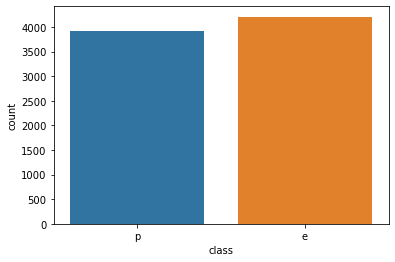

In [28]:
sns.countplot(x='class', data=data)
pass

Заметим, что соотношение грибов по классам примерно равное, но съедобных в выборке больше.

Получим сводную информацию о признаках:

*Обратим внимание, что в данном наборе все признаки категориальные!*

In [29]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Поскольку у нас есть только категориальные признаки, здесь не будет кучи красивых картинок и графиков, которые показывают различные зависимости и просто позволяют посмотреть на красивое. Но все равно попробуем что-нибудь еще визуализировать, чтобы было не так грустно и пусто! 

Например, посмотрим, как распределяется цвет шляпки у грибов. 

** коричневый (brown=n),темно-коричневый (buff=b), цвет корицы (cinnamon=c), серый (gray=g), зеленый (green=r), розовый (pink=p), фиолетовый (purple=u), красный (red=e), белый (white=w), желтый (yellow=y)*

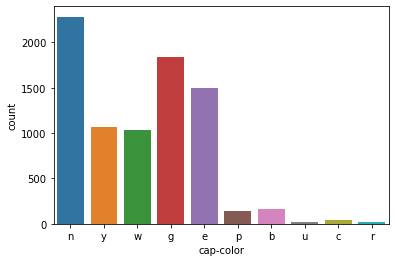

In [30]:
sns.countplot(x = 'cap-color', data=data)
pass


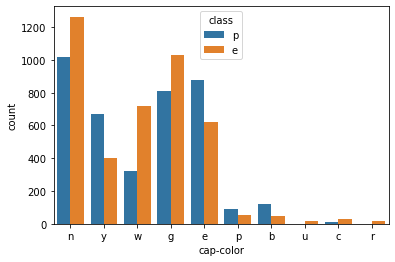

In [31]:
sns.countplot(x = 'cap-color', hue = 'class', data=data)
pass

Заметим, что сильного перевеса в сторону съедобности несъедобности нет, т.е. только по цвету мы не можем сказать, что гриб ядовитый/несъедобный.

Да, среди желтых, красных, фиолетовых и темно-коричневых больше тех, которые можно съесть только один раз в жизни, но немало и тех, которых можно будет съесть еще.

Посмотрим, что можно еще сравнить. Как насчет запаха?

** Миндаль (almond=a), анис (anise=l), креозот(деготь/железная дорога, на ваш вкус) (creosote=c), рыба (fishy=y), отвратительный (foul=f), тухлый (musty=m), без запаха (none=n), острый (pungent=p), пряный (spicy=s)*

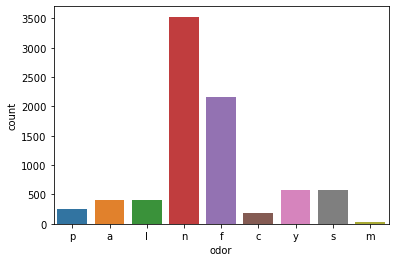

In [32]:
sns.countplot(x = 'odor', data=data)
pass

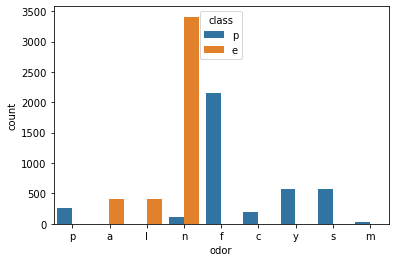

In [33]:
sns.countplot(x = 'odor', hue = 'class', data=data)
pass

Уже интереснее! Получается, что только по запаху можно определить съедобен гриб или нет? Например, вы спокойно можете класть в корзинку гриб, если чувствуете запах аниса или миндаля. Другие запахи свидетельствуют о том, что такой гриб пробовать не стоит. А что если у гриба нет запаха? Ведь таких, как мы видим, практически половина от общего числа. А что если у вас все еще не вернулись запахи после популярнейшей сейчас напасти? На эти и другие вопросы мы постараемся ответить позже, с помощью более умных алгоритмов, чем просто просмотр графика. Поэтому перейдем к следующему этапу.

# 3. Обработка пропущенных значений #

Судя по сводной табличке в самом начале, можно заметить, что пропущенных значений нет. Но убедимся в этом еще раз:

In [34]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Красота да и только, спокойно можно пропустить этот этап.

# 4. Обработка категориальных признаков #

А таких здесь большое количество.

In [37]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
print(categorical_columns)

numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(numerical_columns)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

[]


Еще раз убедились, что у нас нет количественных признаков, только категориальные. Займемся ими

In [38]:
for c in categorical_columns:
    print(c, data[c].unique())

class ['p' 'e']

cap-shape ['x' 'b' 's' 'f' 'k' 'c']

cap-surface ['s' 'y' 'f' 'g']

cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

bruises ['t' 'f']

odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

gill-attachment ['f' 'a']

gill-spacing ['c' 'w']

gill-size ['n' 'b']

gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

stalk-shape ['e' 't']

stalk-root ['e' 'c' 'b' 'r' '?']

stalk-surface-above-ring ['s' 'f' 'k' 'y']

stalk-surface-below-ring ['s' 'f' 'y' 'k']

stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

veil-type ['p']

veil-color ['w' 'n' 'o' 'y']

ring-number ['o' 't' 'n']

ring-type ['p' 'e' 'l' 'f' 'n']

spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']

population ['s' 'n' 'a' 'v' 'y' 'c']

habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [41]:
data_describe = data.describe(include = [object])
data.describe(include = [object])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [42]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['class', 'bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape'] ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


Обработаем бинарные признаки:

In [47]:
data['class'] = pd.factorize(data['class'])[0] #0 - ядовитые, 1 - съедобные
data['bruises'] = pd.factorize(data['bruises'])[0] #повреждения 0 - есть, 1 - нет
data['gill-attachment'] = pd.factorize(data['gill-attachment'])[0] #гимений 0 - есть, 1 - нет
data['gill-spacing'] = pd.factorize(data['gill-spacing'])[0] 
data['gill-size'] = pd.factorize(data['gill-size'])[0] 
data['stalk-shape'] = pd.factorize(data['stalk-shape'])[0] 

А сейчас займемся небинарными признаками, которых у нас больше всего...
Применим к ним метод векторизации. Каждый такой признак мы разобьем на несколько, по числу его уникальных вхождений.

In [48]:
data[nonbinary_columns]

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,p,k,e,s,s,w,w,w,o,p,k,s,u
1,x,s,y,a,k,c,s,s,w,w,w,o,p,n,n,g
2,b,s,w,l,n,c,s,s,w,w,w,o,p,n,n,m
3,x,y,w,p,n,e,s,s,w,w,w,o,p,k,s,u
4,x,s,g,n,k,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,n,y,?,s,s,o,o,o,o,p,b,c,l
8120,x,s,n,n,y,?,s,s,o,o,n,o,p,b,v,l
8121,f,s,n,n,n,?,s,s,o,o,o,o,p,b,c,l
8122,k,y,n,y,b,?,s,k,w,w,w,o,e,w,v,l


In [49]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',

       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',

       'cap-surface_s', 'cap-surface_y',

       ...

       'population_s', 'population_v', 'population_y', 'habitat_d',

       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',

       'habitat_w'],

      dtype='object', length=106)


Из 16 столбцов получилось уже 106. Теперь нам нужно соединить всё это в одну таблицу.

In [53]:
data = pd.concat((data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(8124, 112)


Немного математики. Было 23 столбца, из них 6 бинарные, а 16 небинарные, из 16 получилось 106, а другие 6 так и остались. Получилось 106+6=112, всё верно.

16+6 != 23. Куда же делся еще один признак?! Причем они все категориальные, это уже проверено.

Если бы мы обратили внимание ранее, признак veil-type имеет лишь одно значение(в данном наборе данных), поэтому, в общем-то, толку от него нет, не будем о нем и вспоминать...

Ну а поскольку количественных признаков у нас нет, то предобработку данных мы на этом и закончим, и никакая нормализация нам тут не нужна. 

# 6. Разбиваем данные на обучающую и тестовую выборки #

In [54]:
X = data.drop('class', axis = 1)
y = data['class']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(6093, 2031)

# Метод k-ближайших соседей #


In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [57]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.0

In [59]:
err_test = 1 - knn.score(X_test, y_test)
err_test

0.0

Именно в этот момент я подумал, что что-то сломалось и не может же быть все так хорошо, поэтому попробуем испортить или улучшить полученный результат

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 39)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=39)

In [67]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict) #он всё-таки может считать с ошибками!
err_test

0.0014771048744460858

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [69]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.0

И подбор оптимального количества соседей даже не нужен. Конечно, смысла особо нет, но давайте проверим есть ли ошибки на обучающей выборке. 

In [71]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.0


# Предварительные выводы # 

Здесь пора бы сделать какие-нибудь выводы. 
Как мы видим, из-за отсуствия ошибок, можно придти к выводу, что задача классификации грибов на съедобные и условно несъедобные/ядовитые по внешним признакам имеет место быть. Причем, как было замечено уже в самом начале, даже по запаху можно определить с большой точностью, к какому классу относится найденный гриб.

Но я считаю, что все вышесказанное не может со 100% вероятностью быть верным. В выборке представлено 8 тысяч объектов, в то время как в царстве грибов описано около 100 тысяч, а по некоторым оценкам их может быть около 1.5млн! Также следует отметить, что некоторые виды признаков, которые могут быть у грибов, в данной выборке не встречались. Чего стоит бедный veil-type, который мы беспощадно выбросили! В выборке представлен только 1 его вид, хотя их два. Такое же было замечено и у других признаков.

В общем, всем этим хотелось бы сказать, что не стоит есть незнакомые вам грибы! 

Ну и хотелось бы попробовать применить другие методы, возможно сравнить их.

# Рубрика эксперименты, еще выводы ниже #

Стоит попробовать разбить данные для обучающей и тестовой выборки по-другому. Для начала попробуем обучить на 25%

In [88]:
X = data.drop('class', axis = 1)
y = data['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(2031, 6093)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [90]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.0

Отлично, ошибок нет! Сделаем обучающую еще меньше, 5%

In [91]:
X = data.drop('class', axis = 1)
y = data['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.95, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(406, 7718)

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [100]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.008292303705623219

Уже интересно! Попробуем здесь использовать подбор оптимального числа для метода

In [101]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.004878048780487809 1


In [104]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test, best_n_neighbors)

0.0 0.0019435086810054417 1


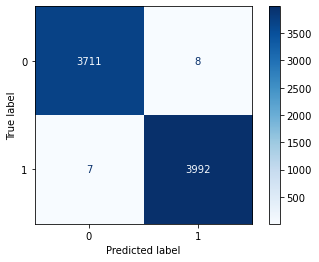

In [105]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
pass

Достаточно хороший результат! Учитывая, что для обучения мы использовали 406 объектов. 

Попробуем для этого же процентного соотношения и другие методы.

# SVC #

In [106]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.014778325123152709 0.023062969681264575


In [107]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC(gamma='auto')
grid = GridSearchCV(svc, cv=3, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.0024691358024692134 10.0


In [109]:
svc = SVC(C = best_C, gamma='auto').fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.0 0.005312257061414874


Так-с, здесь результат получился хуже, чем с knn. Попробуем что-нибудь еще..

# Random Forest #

In [113]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.0020730759264058047


# Extremely Randomized Trees #

In [111]:
from sklearn import ensemble
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.0020730759264058047


# AdaBoost #

In [112]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.0 0.003109613889608707


# GBT #

In [115]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0 0.003109613889608707


В целом оказалось, что для такого объема выборки самым эффективным так и остался knn с подбором оптимального количества соседей. Чуть хуже себя показали Random Forest и Extremely Randomized Trees. В целом, выводы по задаче были сделаны ранее, что-то новое сложно добавить. Спасибо за внимание, теперь вы чуть больше узнали о грибах!


